In [239]:
import os
import csv
import requests
import numpy as np
import pandas as pd
# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt #visualization

from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse


In [204]:
#for dirname, _, filenames in os.walk('/Users/eyal.beigman/COVID19/Data/'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


In [273]:
# Update County Case file form NYT Data Base
dataset = pd.read_csv('/Users/eyal.beigman/COVID19/Data/us-counties.csv',index_col=3,parse_dates=[3])
prev_latest_date=max(dataset.index)
response = requests.get('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
decoded_content = response.content.decode('utf-8')
cr = csv.reader(decoded_content.splitlines(), delimiter=',')
my_list=list(cr)
myheadlines=my_list[0]
lst=[]
for ll in my_list[1:]:
    lst.append(dict(zip(myheadlines,ll))) 
pd.DataFrame(lst).to_csv('/Users/eyal.beigman/COVID19/Data/us-counties.csv')
dataset = pd.read_csv('/Users/eyal.beigman/COVID19/Data/us-counties.csv',index_col=3,parse_dates=[3])
del(dataset['Unnamed: 0'])
dataset=dataset[['state','county','cases','deaths']]
latest_date=max(dataset.index)
if latest_date>prev_latest_date:
    print('New data since ',latest_date.date())
else:
    print('No update since ',latest_date.date())


New data since  2020-05-11


In [274]:
# Aggregate county data to state by state count of cases and deaths
cnty=dataset[['state','county']].sort_values('date',ascending=True).sort_values('county').sort_values('state').drop_duplicates()
lst=[]
for state in sorted(set(cnty['state'])):
    df0=dataset[dataset['state']==state]
    mysum=sum([max(df0[df0['county']==county]['deaths']) for county in set(cnty[cnty['state']==state]['county'])])
    lst.append({'state':state,'deaths':mysum})
df=pd.DataFrame(lst).sort_values('deaths',ascending=False)
print('Aggregate death count ',df['deaths'].sum())
df=df.set_index('state')
#df
#print(100*df['deaths']['New York']/df['deaths'].sum())


Aggregate death count  82465


In [275]:
print('Aggregate death count ',df['deaths'].sum())
print('New York',100*df['deaths']['New York']/df['deaths'].sum())
print('New Jersey',100*df['deaths']['New Jersey']/df['deaths'].sum())
print('Michigan',100*df['deaths']['Michigan']/df['deaths'].sum())


Aggregate death count  82465
New York 34.17328563633056
New Jersey 11.316316012853939
Michigan 5.56114715333778


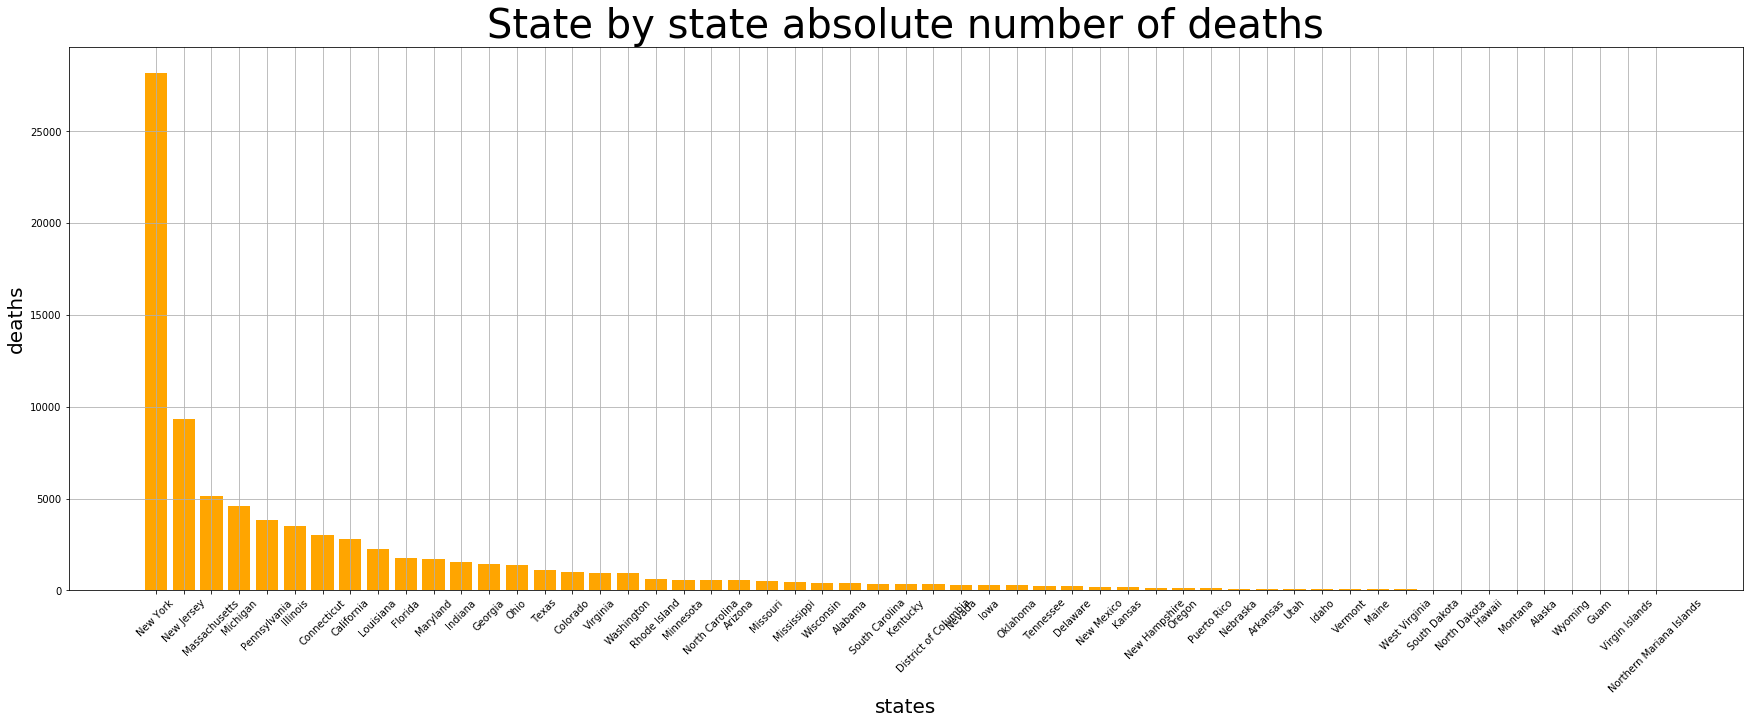

In [276]:
plt.figure(figsize=(30,10))
#lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(df.index, df['deaths'], color = 'orange')
plt.xlabel('states', fontsize=20)
plt.ylabel('deaths',fontsize=20)
plt.xticks(rotation=45)
plt.title('State by state absolute number of deaths',fontsize=40)
#plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

In [277]:
pop=pd.read_csv('/Users/eyal.beigman/COVID19/Data/nst-est2019-alldata.csv',index_col=4)
pop=pop[['POPESTIMATE2019']]
rdf=pd.DataFrame([{'state':state,'reldeath':1e5*df['deaths'][state]/pop['POPESTIMATE2019'][state]} 
              for state in set(df.index)&set(pop.index)]).set_index('state').sort_values('reldeath',ascending=False)

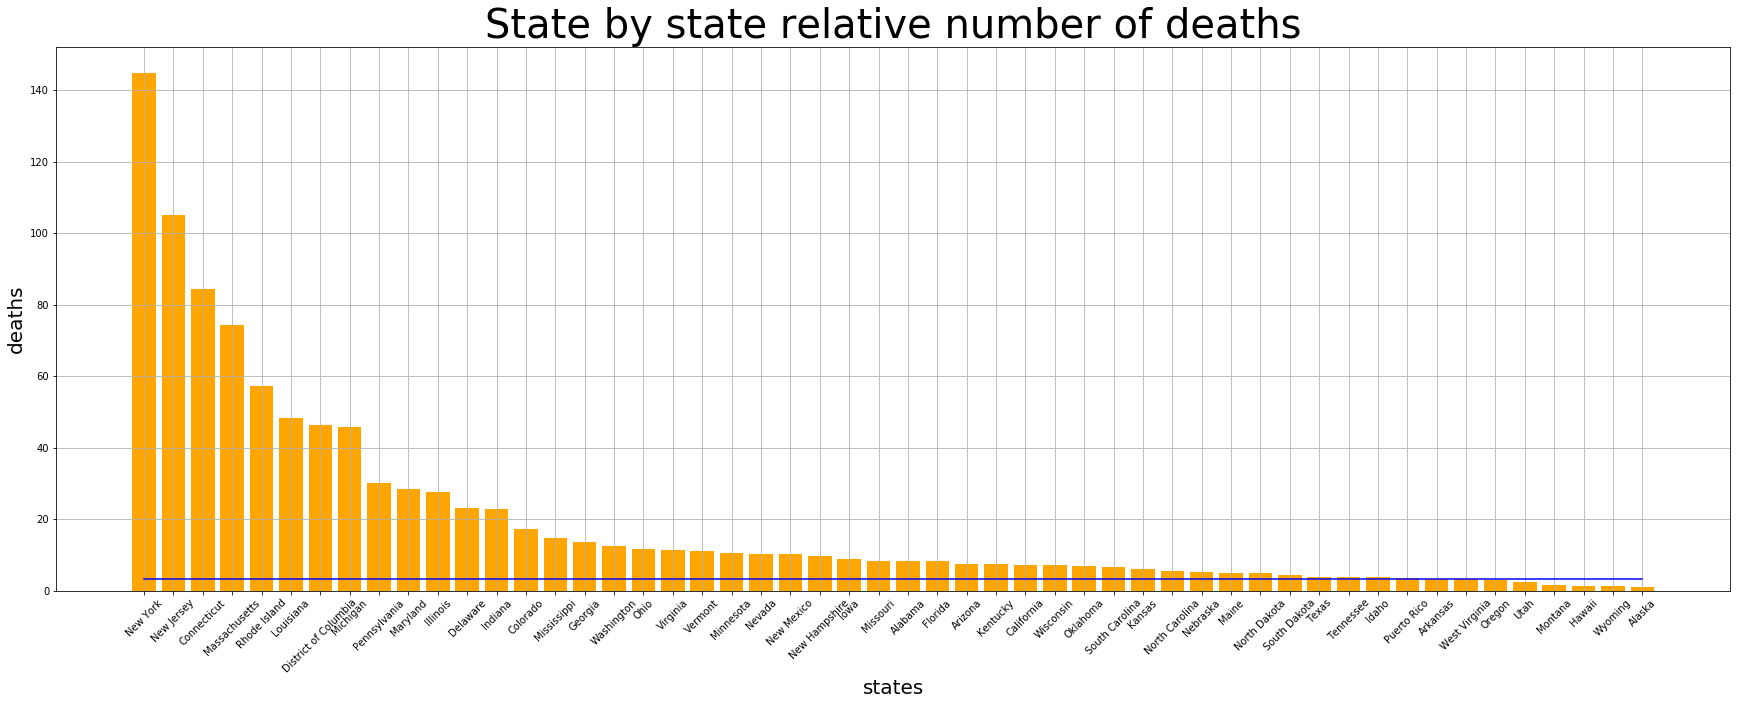

In [278]:
plt.figure(figsize=(30,10))
#lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(rdf.index, rdf['reldeath'], color = 'orange')
plt.plot(rdf.index, [3.409]*len(rdf.index), color = 'blue')
plt.xlabel('states', fontsize=20)
plt.ylabel('deaths',fontsize=20)
plt.xticks(rotation=45)
plt.title('State by state relative number of deaths',fontsize=40)
#plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

In [279]:
1e5*300/8.8e6

3.409090909090909

## New Jersey Analysis

In [280]:
state='New Jersey'
counties=set(dataset[dataset['state']==state]['county'])
df0=dataset[dataset['state']==state]
df=pd.DataFrame([{'county':county,'deaths':max(df0[df0['county']==county]['deaths'])} 
              for county in counties]).set_index('county').sort_values('deaths',ascending=False)


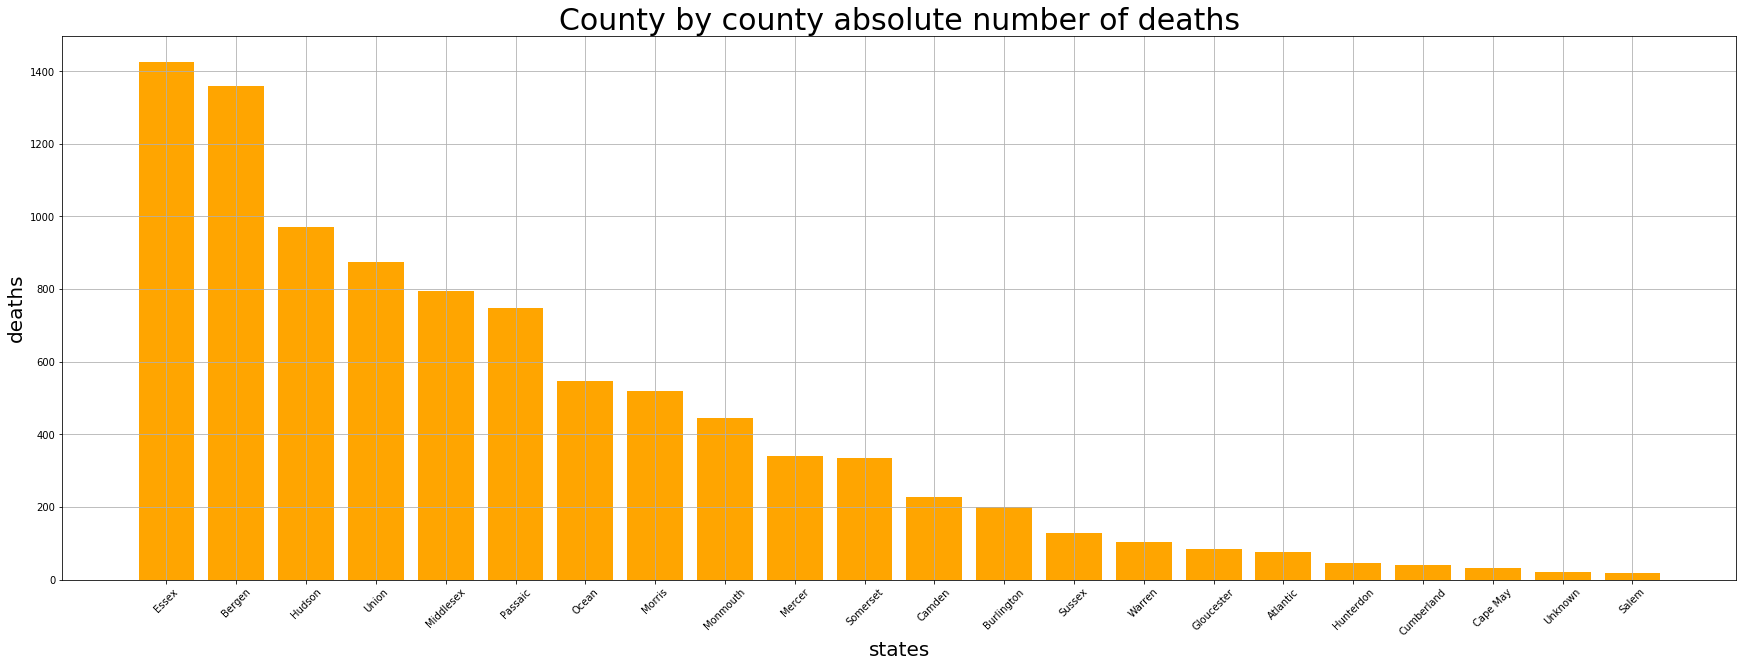

In [281]:
plt.figure(figsize=(30,10))
#lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(df.index, df['deaths'], color = 'orange')
plt.xlabel('states', fontsize=20)
plt.ylabel('deaths',fontsize=20)
plt.xticks(rotation=45)
plt.title('County by county absolute number of deaths',fontsize=30)
#plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

In [282]:
', '.join(sorted(counties))

'Atlantic, Bergen, Burlington, Camden, Cape May, Cumberland, Essex, Gloucester, Hudson, Hunterdon, Mercer, Middlesex, Monmouth, Morris, Ocean, Passaic, Salem, Somerset, Sussex, Union, Unknown, Warren'

In [283]:
county='Mercer'
df1=df0[df0['county']==county]
df1.tail(5)

,state,county,cases,deaths
date,,,,
2020-05-07,New Jersey,Mercer,4986,313
2020-05-08,New Jersey,Mercer,5111,322
2020-05-09,New Jersey,Mercer,5233,330
2020-05-10,New Jersey,Mercer,5317,334
2020-05-11,New Jersey,Mercer,5393,340


In [284]:
data="""Bergen County	936,692	3.35%
Middlesex County	829,685	2.35%
Essex County	799,767	2.00%
Hudson County	676,061	6.36%
Monmouth County	621,354	-1.45%
Ocean County	601,651	4.17%
Union County	558,067	3.83%
Camden County	507,078	-1.24%
Passaic County	503,310	0.25%
Morris County	494,228	0.32%
Burlington County	445,384	-0.83%
Mercer County	369,811	0.56%
Somerset County	331,164	2.18%
Gloucester County	291,408	0.85%
Atlantic County	265,429	-3.36%
Cumberland County	150,972	-3.66%
Sussex County	140,799	-5.39%
Hunterdon County	124,714	-2.05%
Warren County	105,779	-2.58%
Cape May County	92,560	-4.79%
Salem County	62,607	-5.11%
"""
pop=pd.DataFrame([{'county':x[0].split()[0],'pop':int(''.join(x[1].split(',')))} 
                  for x in [ww.split('	') for ww in data.split('\n')][:-1]]).set_index('county')
rdf=pd.DataFrame([{'county':county,'reldeath':1e5*df['deaths'][county]/pop['pop'][county]} 
              for county in set(df.index)&set(pop.index)]).set_index('county').sort_values('reldeath',ascending=False)

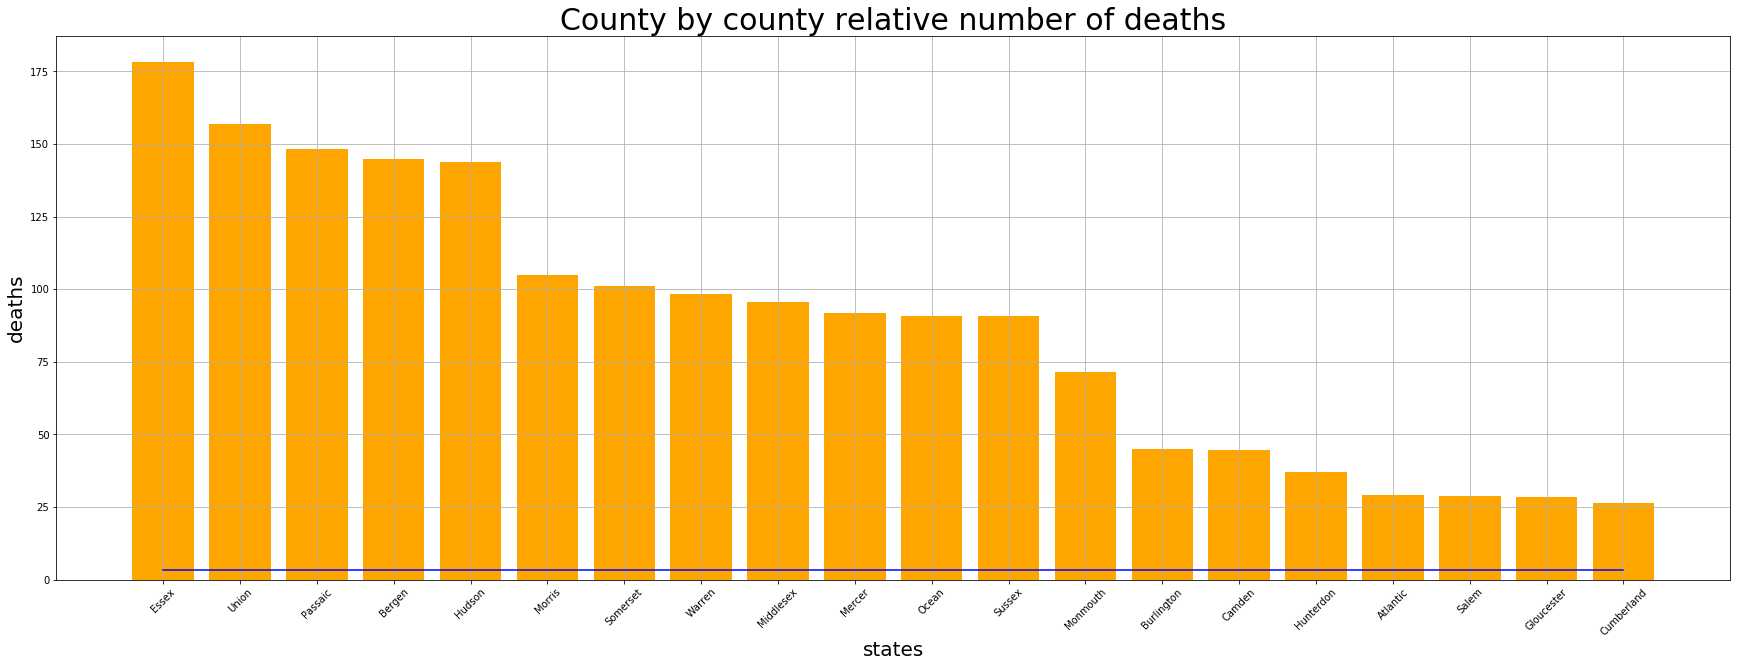

In [285]:
plt.figure(figsize=(30,10))
#lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(rdf.index, rdf['reldeath'], color = 'orange')
plt.plot(rdf.index, [3.409]*len(rdf.index), color = 'blue')
plt.xlabel('states', fontsize=20)
plt.ylabel('deaths',fontsize=20)
plt.xticks(rotation=45)
plt.title('County by county relative number of deaths',fontsize=30)
#plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

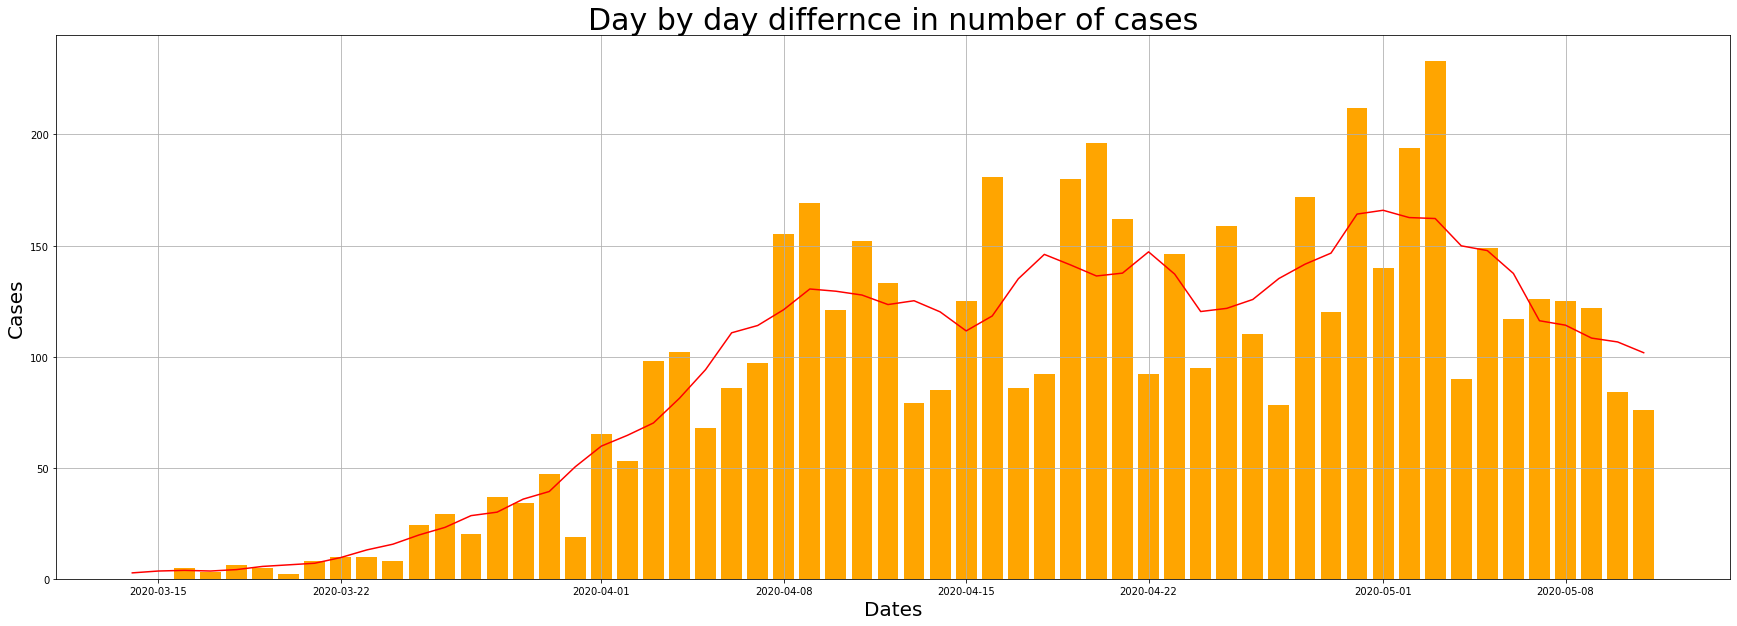

In [286]:
plt.figure(figsize=(30,10))
#lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(df1.index, df1['cases'].diff(), color = 'orange')
plt.plot(df1.index, df1['cases'].diff().rolling(7,min_periods=1,center=True).mean(), color = 'red')
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Cases',fontsize=20)
#plt.legend(frameon=True, fontsize=20)
plt.title('Day by day differnce in number of cases',fontsize=30)
plt.grid(True)
plt.show()

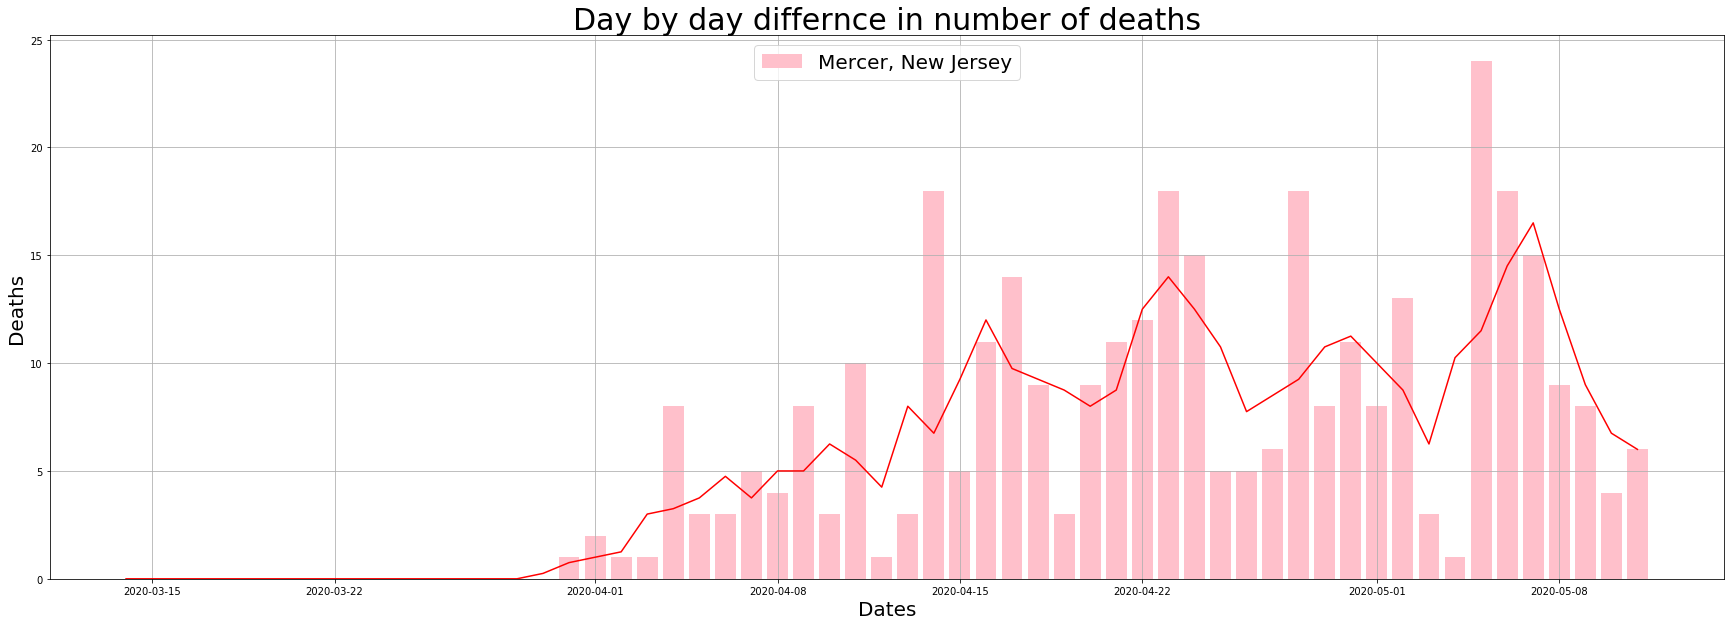

In [287]:
plt.figure(figsize=(30,10))
#lbl0='Lombardia '+str(df0['longitude'][0])+' '+str(df0['latitude'][0])
plt.bar(df1.index, df1['deaths'].diff(), color = 'pink', label=county+', '+state)
plt.plot(df1.index, df1['deaths'].diff().rolling(4,min_periods=1,center=True).mean(), color = 'red')
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Deaths',fontsize=20)
plt.legend(frameon=True, fontsize=20)
plt.title('Day by day differnce in number of deaths',fontsize=30)
plt.grid(True)
plt.show()